In [15]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import Word2Vec
import pandas as pd

In [8]:
df = pd.read_csv('preprocessed_data.csv')
df.head()

,Id,Review,Label,cleaned_reviews
0,0,good and interesting,5,ood interesting
1,1,"This class is very helpful to me. Currently, I...",5,"class helpful . currently , 'm still learning ..."
2,2,like!Prof and TAs are helpful and the discussi...,5,ike ! prof ta helpful discussion among student...
3,3,Easy to follow and includes a lot basic and im...,5,asy follow includes lot basic important techni...
4,4,Really nice teacher!I could got the point eazl...,4,eally nice teacher ! could got point eazliy v


In [12]:
X = df['cleaned_reviews']
X.fillna('', inplace=True)
Y = df['Label']
# bag of words
bow = CountVectorizer()
X_bow = bow.fit_transform(X)
# TF-IDF
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(X)
#Word2Vec
w2v = Word2Vec.load('./trained-word2vec-studentReviews.model')
#creating sentence vector:
def sentence_to_vector(sentence, model):
    words = sentence.split()
    word_vectors = [model.wv[word] for word in words if word in model.wv]
    if not word_vectors:  # If the sentence contains no words in the model's vocabulary
        return np.zeros(model.vector_size)
    return np.mean(word_vectors, axis=0)

# Create vectors for all sentences
X_vectors = np.array([sentence_to_vector(sentence, w2v) for sentence in X])

In [13]:
X_train_bow, X_test_bow, Y_train, Y_test = train_test_split(X_bow, Y, test_size=0.2, random_state=42)
X_train_tfidf, X_test_tfidf,_, _ = train_test_split(X_tfidf, Y, test_size=0.2, random_state=42)
X_train_w2v, X_test_w2v,_, _ = train_test_split(X_vectors, Y, test_size=0.2, random_state=42)

### Loading the trained models


In [16]:
#load the trained models
file1 = 'D:/Study/College/IV Sem/Mini Project/Codes/Trained Models/nb_bow.sav'
file2 = 'D:/Study/College/IV Sem/Mini Project/Codes/Trained Models/nb_tfidf.sav'
file3 = 'D:/Study/College/IV Sem/Mini Project/Codes/Trained Models/nb_w2v.sav'
file4 = 'D:/Study/College/IV Sem/Mini Project/Codes/Trained Models/knn_bow.sav'
file5 = 'D:/Study/College/IV Sem/Mini Project/Codes/Trained Models/knn_tfidf.sav'
file6 = 'D:/Study/College/IV Sem/Mini Project/Codes/Trained Models/knn_w2v.sav'
file7 = 'D:/Study/College/IV Sem/Mini Project/Codes/Trained Models/svm_bow.sav'
file8 = 'D:/Study/College/IV Sem/Mini Project/Codes/Trained Models/svm_tfidf.sav'
file9 = 'D:/Study/College/IV Sem/Mini Project/Codes/Trained Models/svm_w2v.sav'
nb_bow = pickle.load(open(file1, 'rb'))
nb_tfidf = pickle.load(open(file2, 'rb'))
nb_w2v = pickle.load(open(file3, 'rb'))
knn_bow = pickle.load(open(file4, 'rb'))
knn_tfidf = pickle.load(open(file5, 'rb'))
knn_w2v = pickle.load(open(file6, 'rb'))
svm_bow = pickle.load(open(file7, 'rb'))
svm_tfidf = pickle.load(open(file8, 'rb'))
svm_w2v = pickle.load(open(file9, 'rb'))

### Model evaluation

In [17]:
#Naive bayes
nb_pred_bow = nb_bow.predict(X_test_bow)
nb_pred_tfidf = nb_tfidf.predict(X_test_tfidf)
nb_pred_w2v = nb_w2v.predict(X_test_w2v)
#KNN
knn_pred_bow = knn_bow.predict(X_test_bow)
knn_pred_tfidf = knn_tfidf.predict(X_test_tfidf)
knn_pred_w2v = knn_w2v.predict(X_test_w2v)
#SVM
svm_pred_bow = svm_bow.predict(X_test_bow)
svm_pred_tfidf = svm_tfidf.predict(X_test_tfidf)
svm_pred_w2v = svm_w2v.predict(X_test_w2v)
print("Accuracy score:")
print('Naive Bayes(Bag of Words) accurancy: ', accuracy_score(Y_test, nb_pred_bow))
print('Naive Bayes(TF-IDF) accurancy: ', accuracy_score(Y_test, nb_pred_tfidf))
print('Naive Bayes(Word2Vec) accurancy: ', accuracy_score(Y_test, nb_pred_w2v))
print()
print('KNN(Bag of Words) accurancy: ', accuracy_score(Y_test, knn_pred_bow))
print('KNN(TF-IDF) accurancy: ', accuracy_score(Y_test, knn_pred_tfidf))
print('KNN(Word2Vec) accurancy: ', accuracy_score(Y_test, knn_pred_w2v))
print()
print('SVM(Bag of Words) accurancy: ', accuracy_score(Y_test, svm_pred_bow))
print('SVM(TF-IDF) accurancy: ', accuracy_score(Y_test, svm_pred_tfidf))
print('SVM(Word2Vec) accurancy: ', accuracy_score(Y_test, svm_pred_w2v))
print()
print("Precision:")
print('Naive Bayes(Bag of Words) Precision: ', precision_score(Y_test, nb_pred_bow, average='weighted'))
print('Naive Bayes(TF-IDF) Precision: ', precision_score(Y_test, nb_pred_tfidf, average='weighted'))
print('Naive Bayes(Word2Vec) Precision: ', precision_score(Y_test, nb_pred_w2v, average='weighted'))
print()
print('KNN(Bag of Words) Precision: ', precision_score(Y_test, knn_pred_bow, average='weighted'))
print('KNN(TF-IDF) Precision: ', precision_score(Y_test, knn_pred_tfidf, average='weighted'))
print('KNN(Word2Vec) Precision: ', precision_score(Y_test, knn_pred_w2v, average='weighted'))
print()
print('SVM(Bag of Words) Precision: ', precision_score(Y_test, svm_pred_bow, average='weighted'))
print('SVM(TF-IDF) Precision: ', precision_score(Y_test, svm_pred_tfidf, average='weighted'))
print('SVM(Word2Vec) Precision: ', precision_score(Y_test, svm_pred_w2v, average='weighted'))
print()
print("Recall:")
print('Naive Bayes(Bag of Words) Precision: ', recall_score(Y_test, nb_pred_bow, average='weighted'))
print('Naive Bayes(TF-IDF) Precision: ', recall_score(Y_test, nb_pred_tfidf, average='weighted'))
print('Naive Bayes(Word2Vec) Precision: ', recall_score(Y_test, nb_pred_w2v, average='weighted'))
print()
print('KNN(Bag of Words) Precision: ', recall_score(Y_test, knn_pred_bow, average='weighted'))
print('KNN(TF-IDF) Precision: ', recall_score(Y_test, knn_pred_tfidf, average='weighted'))
print('KNN(Word2Vec) Precision: ', recall_score(Y_test, knn_pred_w2v, average='weighted'))
print()
print('SVM(Bag of Words) Precision: ', recall_score(Y_test, svm_pred_bow, average='weighted'))
print('SVM(TF-IDF) Precision: ', recall_score(Y_test, svm_pred_tfidf, average='weighted'))
print('SVM(Word2Vec) Precision: ', recall_score(Y_test, svm_pred_w2v, average='weighted'))
print()
print("F1 score:")
print('Naive Bayes(Bag of Words) Precision: ', f1_score(Y_test, nb_pred_bow, average='weighted'))
print('Naive Bayes(TF-IDF) Precision: ', f1_score(Y_test, nb_pred_tfidf, average='weighted'))
print('Naive Bayes(Word2Vec) Precision: ', f1_score(Y_test, nb_pred_w2v, average='weighted'))
print()
print('KNN(Bag of Words) Precision: ', f1_score(Y_test, knn_pred_bow, average='weighted'))
print('KNN(TF-IDF) Precision: ', f1_score(Y_test, knn_pred_tfidf, average='weighted'))
print('KNN(Word2Vec) Precision: ', f1_score(Y_test, knn_pred_w2v, average='weighted'))
print()
print('SVM(Bag of Words) Precision: ', f1_score(Y_test, svm_pred_bow, average='weighted'))
print('SVM(TF-IDF) Precision: ', f1_score(Y_test, svm_pred_tfidf, average='weighted'))
print('SVM(Word2Vec) Precision: ', f1_score(Y_test, svm_pred_w2v, average='weighted'))
print()

Accuracy score:
Naive Bayes(Bag of Words) accurancy:  0.7648103158288171
Naive Bayes(TF-IDF) accurancy:  0.7463091011025976
Naive Bayes(Word2Vec) accurancy:  0.5712950850308354

KNN(Bag of Words) accurancy:  0.7352831246495982
KNN(TF-IDF) accurancy:  0.7336479162773314
KNN(Word2Vec) accurancy:  0.7008970285927864

SVM(Bag of Words) accurancy:  0.7602784526256774
SVM(TF-IDF) accurancy:  0.7728929172117361
SVM(Word2Vec) accurancy:  0.7255185946552046

Precision:
Naive Bayes(Bag of Words) Precision:  0.7199504398631771
Naive Bayes(TF-IDF) Precision:  0.6217066253038389
Naive Bayes(Word2Vec) Precision:  0.6975208076727669

KNN(Bag of Words) Precision:  0.6516850838599765
KNN(TF-IDF) Precision:  0.6384213094074555
KNN(Word2Vec) Precision:  0.6887648255436327

SVM(Bag of Words) Precision:  0.7103894776983103
SVM(TF-IDF) Precision:  0.719273341924468
SVM(Word2Vec) Precision:  0.6253724549356331

Recall:
Naive Bayes(Bag of Words) Precision:  0.7648103158288171
Naive Bayes(TF-IDF) Precision:  0

c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM(Word2Vec) Precision:  0.6662536601631782



#### plotitng accuracies

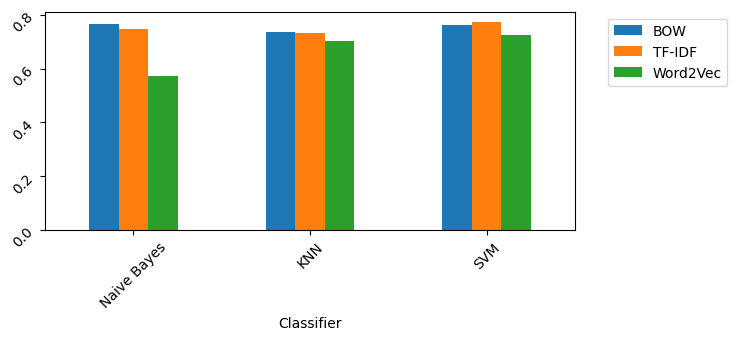

In [20]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
accuracy = {
    "Classifier" : ["Naive Bayes", "KNN", "SVM"],
    "BOW" : [accuracy_score(Y_test, nb_pred_bow), accuracy_score(Y_test, knn_pred_bow), accuracy_score(Y_test, svm_pred_bow)],
    "TF-IDF" : [accuracy_score(Y_test, nb_pred_tfidf), accuracy_score(Y_test, knn_pred_tfidf), accuracy_score(Y_test, svm_pred_tfidf)],
    "Word2Vec": [accuracy_score(Y_test, nb_pred_w2v), accuracy_score(Y_test, knn_pred_w2v), accuracy_score(Y_test, svm_pred_w2v)]
}
acc_df = pd.DataFrame(accuracy)
acc_df.set_index('Classifier').plot(kind="bar", align='center', width=0.5)
plt.tick_params(rotation = 45)
# Move the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### plotting precision scores

c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


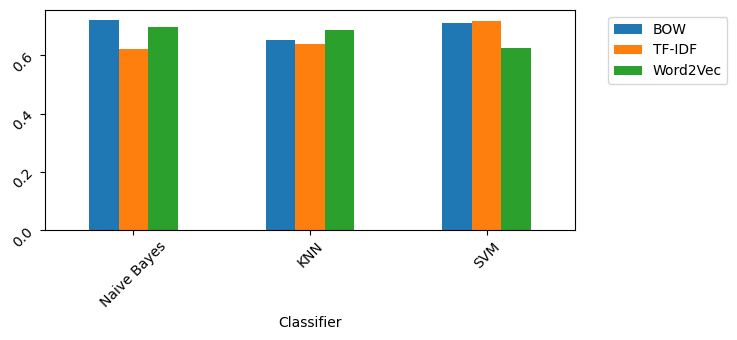

In [27]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
precision = {
    "Classifier" : ["Naive Bayes", "KNN", "SVM"],
    "BOW" : [precision_score(Y_test, nb_pred_bow, average='weighted'),precision_score(Y_test, knn_pred_bow, average='weighted'),precision_score(Y_test, svm_pred_bow, average='weighted')],
    "TF-IDF" : [precision_score(Y_test, nb_pred_tfidf, average='weighted'),precision_score(Y_test, knn_pred_tfidf, average='weighted'),precision_score(Y_test, svm_pred_tfidf, average='weighted')],
    "Word2Vec": [precision_score(Y_test, nb_pred_w2v, average='weighted'),precision_score(Y_test, knn_pred_w2v, average='weighted'),precision_score(Y_test, svm_pred_w2v, average='weighted')]
}
prec_df = pd.DataFrame(precision)
prec_df.set_index('Classifier').plot(kind="bar", align='center', width=0.5)
plt.tick_params(rotation = 45)
# Move the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Recall 

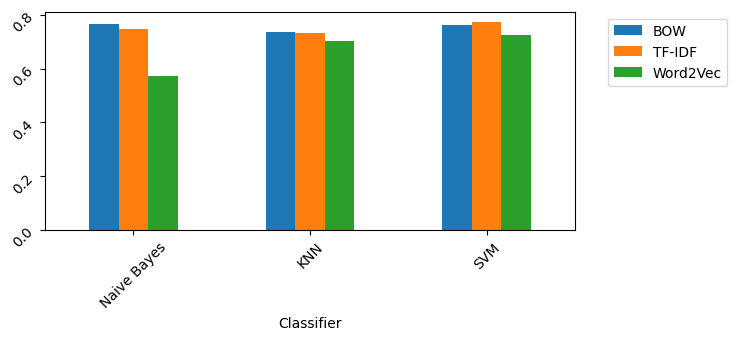

In [26]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
recall = {
    "Classifier" : ["Naive Bayes", "KNN", "SVM"],
    "BOW" : [recall_score(Y_test, nb_pred_bow, average='weighted'),recall_score(Y_test, knn_pred_bow, average='weighted'),recall_score(Y_test, svm_pred_bow, average='weighted')],
    "TF-IDF" : [recall_score(Y_test, nb_pred_tfidf, average='weighted'),recall_score(Y_test, knn_pred_tfidf, average='weighted'),recall_score(Y_test, svm_pred_tfidf, average='weighted')],
    "Word2Vec": [recall_score(Y_test, nb_pred_w2v, average='weighted'),recall_score(Y_test, knn_pred_w2v, average='weighted'),recall_score(Y_test, svm_pred_w2v, average='weighted')]
}
recall_df = pd.DataFrame(recall)
recall_df.set_index('Classifier').plot(kind="bar", align='center', width=0.5)
plt.tick_params(rotation = 45)
# Move the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### F1 score

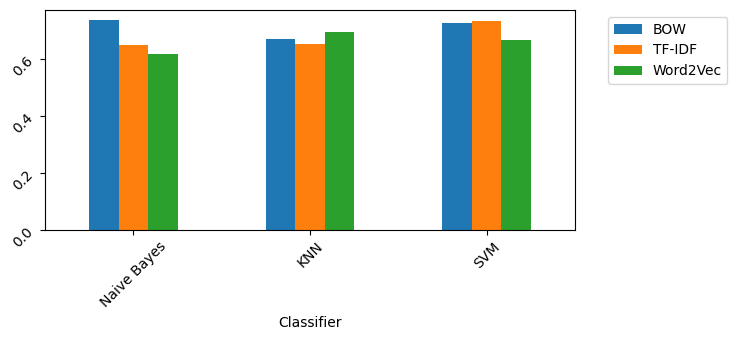

In [25]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
f1 = {
    "Classifier" : ["Naive Bayes", "KNN", "SVM"],
    "BOW" : [f1_score(Y_test, nb_pred_bow, average='weighted'),f1_score(Y_test, knn_pred_bow, average='weighted'),f1_score(Y_test, svm_pred_bow, average='weighted')],
    "TF-IDF" : [f1_score(Y_test, nb_pred_tfidf, average='weighted'),f1_score(Y_test, knn_pred_tfidf, average='weighted'),f1_score(Y_test, svm_pred_tfidf, average='weighted')],
    "Word2Vec": [f1_score(Y_test, nb_pred_w2v, average='weighted'),f1_score(Y_test, knn_pred_w2v, average='weighted'),f1_score(Y_test, svm_pred_w2v, average='weighted')]
}
f1_df = pd.DataFrame(f1)
f1_df.set_index('Classifier').plot(kind="bar", align='center', width=0.5)
plt.tick_params(rotation = 45)
# Move the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Confusion Matrix

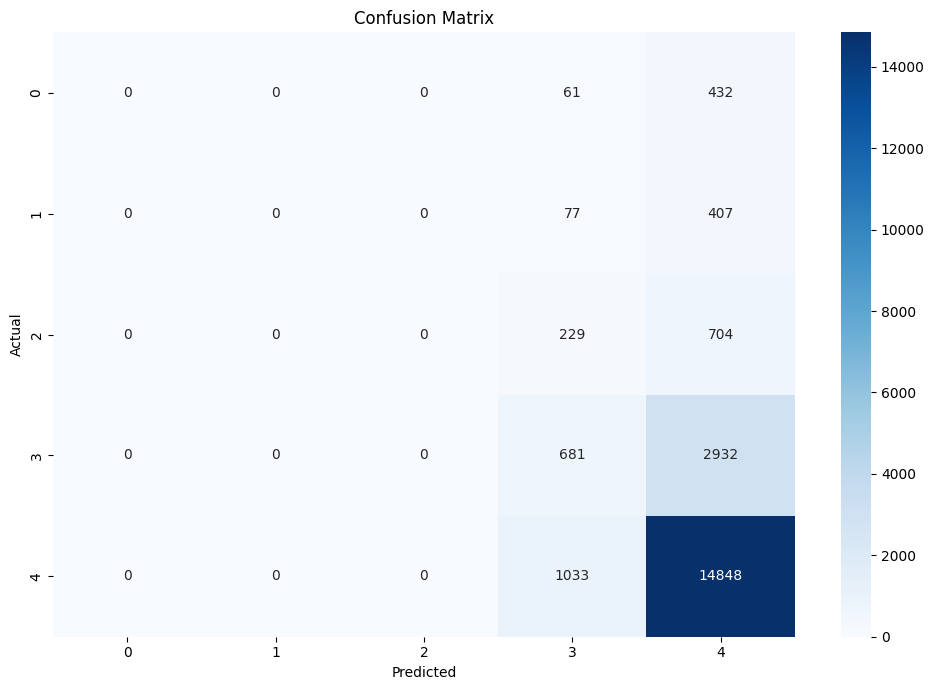

In [28]:
conf_matrix = confusion_matrix(Y_test, svm_pred_w2v)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()